# Exploratory Data Analysis 

Here are five hypotheses for the dataset Titanic Data Set from Kaggle(https://www.kaggle.com/c/titanic). 

Survival rate association by the passenger gender.
Survival rate association by the passenger age.
Survival rate association by the passenger class.
Survival rate association by the passenger fare.
Survival rate association by the passenger port of embarked.

**Import Libraries as pandas(pd), numpy(np), and matplotlib(plt)**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset Titanic.csv**

In [14]:
df = pd.read_csv('Titanic.csv')

#### Gender, Age, Fare, Class and Port of embarked could be predictors of survival on the Titanic.

**Filtering the Titanic dataset**

In [15]:
df_ch1=df[['Survived', 'Sex', 'Age', 'Pclass', 'Fare', 'Embarked']]
df_ch1
df_ch1.dropna(inplace=True)
df_chy1 = df_ch1[df_ch1['Age'] > 0]
df_chy1

C:\Users\dav_c\AppData\Local\Temp\ipykernel_14344\4054589378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch1.dropna(inplace=True)


,Survived,Sex,Age,Pclass,Fare,Embarked
0,0,male,22.0,3,7.2500,S
1,1,female,38.0,1,71.2833,C
2,1,female,26.0,3,7.9250,S
3,1,female,35.0,1,53.1000,S
4,0,male,35.0,3,8.0500,S
...,...,...,...,...,...,...
709,0,female,39.0,3,29.1250,Q
710,0,male,27.0,2,13.0000,S
711,1,female,19.0,1,30.0000,S
712,1,male,26.0,1,30.0000,C


### Calculate overall survival rate

In [16]:
#The 40% of passenger survived.
survival_rate = df_chy1['Survived'].mean()
survival_rate

0.4044943820224719

**Survival rate association with the passenger gender.**

In [17]:
#75% of the total of the female (261) and 20% of the total of male (453) survived to the Titanic tragedy.
gender_s = df_chy1.groupby('Sex')['Survived'].mean()
gender_s

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

**Survival rate association with the passenger age.**

In [18]:
#age_s = df.groupby(['Sex', pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, np.inf])])['Survived'].mean()
age_s = df_chy1.groupby([pd.cut(df_chy1['Age'], bins=[0, 20, 40, 60, 80, np.inf])])['Survived'].mean()
age_s

Age
(0.0, 20.0]     0.458101
(20.0, 40.0]    0.395833
(40.0, 60.0]    0.390625
(60.0, 80.0]    0.190476
(80.0, inf]          NaN
Name: Survived, dtype: float64

**Survival rate association with the passenger class.**

In [19]:
class_s = df_chy1.groupby('Pclass')['Survived'].mean()
class_s

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

**Survival rate association with the passenger fare.**

In [21]:
fare_s = df_chy1.groupby([pd.cut(df_chy1['Fare'], bins=[0, 20, 35, 50, 65, 80, np.inf])])['Survived'].mean()
fare_s

Fare
(0.0, 20.0]     0.291667
(20.0, 35.0]    0.437086
(35.0, 50.0]    0.382353
(50.0, 65.0]    0.675676
(65.0, 80.0]    0.593750
(80.0, inf]     0.776119
Name: Survived, dtype: float64

**Survival rate association with the passenger port of embarked.**

In [23]:
p_emb = df_chy1.groupby('Embarked')['Survived'].mean()
p_emb

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

# 2 - Hypotheses Plots

##### Survival rate association with the passenger gender.

Text(0.5, 1.0, 'Survival rates by gender')

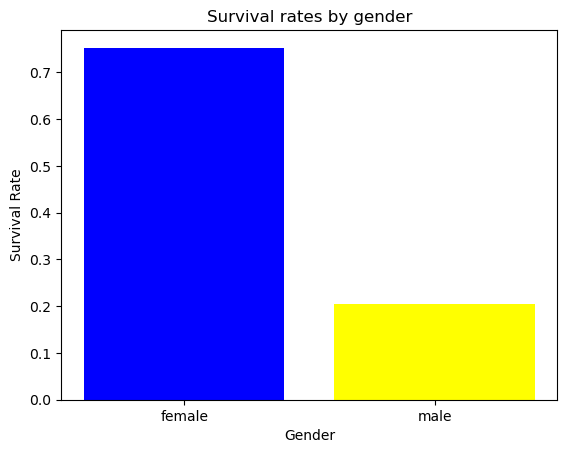

In [44]:
plt.bar(gender_s.index, gender_s.values, color=['blue', 'yellow'])
#plt.axhline(y=survival_rate, color='r', linestyle='-')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival rates by gender')

##### Survival rate association with the passenger age.

Text(0.5, 1.0, 'Survival rates by age group')

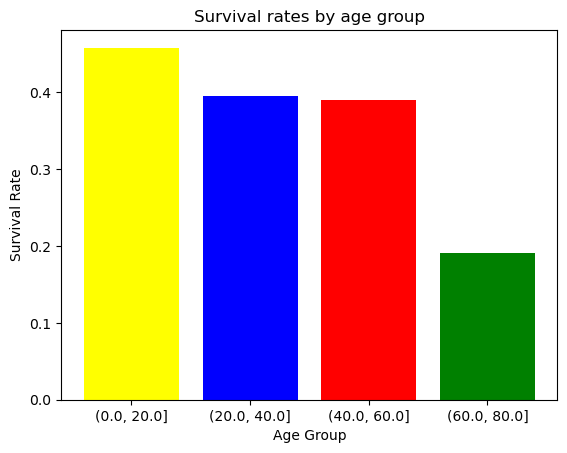

In [38]:
plt.bar(age_s.index.astype(str), age_s.values, color=['yellow', 'blue', 'red', 'green'])
#plt.axhline(y=survival_rate, color='r', linestyle='-')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival rates by age group')

##### Survival rate association with the passenger class.

Text(0.5, 1.0, 'Survival Rates by Passenger Class')

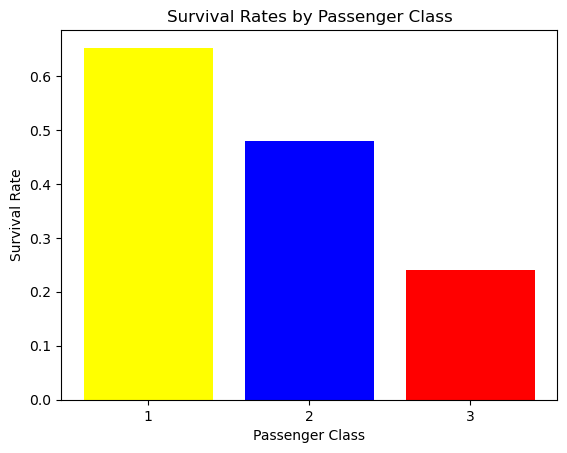

In [39]:
plt.bar(class_s.index.map({1: '1', 2: '2', 3: '3'}), class_s.values, color=['yellow', 'blue', 'red'])
#plt.axhline(y=survival_rate, color='r', linestyle='-')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')

##### Survival rate association with the passenger fare.

Text(0.5, 1.0, 'Survival rates by paid fare')

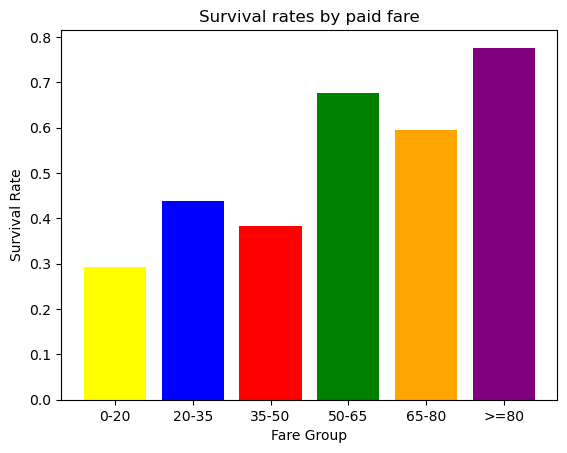

In [40]:
#plt.bar(fare_s.index.astype(str), fare_s.values, color=['yellow', 'blue', 'red', 'green', 'orange', 'purple'])
plt.bar(['0-20', '20-35', '35-50', '50-65', '65-80', '>=80'], fare_s.values, color=['yellow', 'blue', 'red', 'green', 'orange', 'purple'])
#plt.axhline(y=survival_rate, color='r', linestyle='-')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.title('Survival rates by paid fare')

##### Survival rate association with the passenger port of embarked.

Text(0.5, 1.0, 'Survival rates by port of embarked')

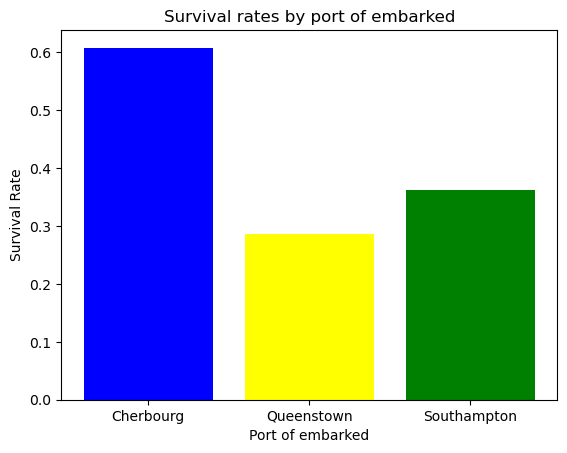

In [42]:
plt.bar(['Cherbourg', 'Queenstown', 'Southampton'], p_emb.values, color=['blue', 'yellow', 'green'])
#plt.axhline(y=survival_rate, color='r', linestyle='-')
plt.xlabel('Port of embarked')
plt.ylabel('Survival Rate')
plt.title('Survival rates by port of embarked')